# TP2 - Sofia Valma-Rantisits

## Extraire les mots-clés relatifs à l'année 1865

In [1]:
import os
import yake

### Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [2]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général"])
ignored

{'conseil communal', 'conseil général'}

In [3]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [4]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

FileNotFoundError: [Errno 2] No such file or directory: '../data/txt/'

In [5]:
# Enlever les fichiers qui ne commencent pas par Bxl_1865
bxl_files = [f for f in files if f.startswith('Bxl_1865')]
len(bxl_files)

11

In [6]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(1865) in f]
txts

['Bxl_1865_Tome_I1_Part_1.txt',
 'Bxl_1865_Tome_II1_Part_6.txt',
 'Bxl_1865_Tome_II1_Part_5.txt',
 'Bxl_1865_Tome_II1_Part_1.txt',
 'Bxl_1865_Tome_II1_Part_7.txt',
 'Bxl_1865_Tome_I1_Part_4.txt',
 'Bxl_1865_Tome_I1_Part_3.txt',
 'Bxl_1865_Tome_I1_Part_2.txt',
 'Bxl_1865_Tome_II1_Part_4.txt',
 'Bxl_1865_Tome_II1_Part_2.txt',
 'Bxl_1865_Tome_II1_Part_3.txt']

In [7]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [8]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

11

In [9]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE DE\n\nBULLETIN\n\nBRUXELLES.\n\nCOMMUNAL.\n\nA N N É E\n\nPREMIER\n\nI 8 6\n\n5.\n\nSEMESTRE.\nÉ\n\nB R U X E L L E S ,\nIMPRIMERIE\n\nBOLS-WITTOUCK,\n\n\x0c\x0cVILLE\n\nDE\n\nBULLETIN\n\nBRUXELLES\n\nCOMMUNAL.\n\nANNÉE\n\nI865.\nSAMEDI '

In [10]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{1865}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [11]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{1865}.txt'), 'r') as f:
    before = f.read()

before[:500]

'VILLE DE\n\nBULLETIN\n\nBRUXELLES.\n\nCOMMUNAL.\n\nA N N É E\n\nPREMIER\n\nI 8 6\n\n5.\n\nSEMESTRE.\nÉ\n\nB R U X E L L E S ,\nIMPRIMERIE\n\nBOLS-WITTOUCK,\n\n\x0c\x0cVILLE\n\nDE\n\nBULLETIN\n\nBRUXELLES\n\nCOMMUNAL.\n\nANNÉE\n\nI865.\nSAMEDI 14 JANVIER.\n\nNUMÉRO i.\n\nCONSEIL\nCOMITÉ S E C R E T\n\nCOMMUNAL.\n\nDU 5 1\n\nDÉCEMBRE\n\n1804.\n\nLe Conseil a nommé au grade de troisième instituteur des écoles communaleles sieurs :\nCoenderaet (Michel), De Bondt (Égide) et Van Aelen (Jean-Baptiste):\nNommé M. Jules Guillery avocat de la ville,\nEt délivré au '

In [12]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(before)

In [102]:
keywords

[('Collège', 1.632570575500228e-05),
 ('Conseil communal', 1.647213915723338e-05),
 ('rue', 1.919911269900265e-05),
 ('BRUXELLES', 2.007319651610238e-05),
 ('CONSEIL', 2.3744710070244646e-05),
 ('rue Haute', 2.61211409017576e-05),
 ('VILLE', 2.7334031203759035e-05),
 ('Bourgmestre', 2.777486230124145e-05),
 ("conseil général d'administration", 3.8450040738659455e-05),
 ('ville de Bruxelles', 4.348946825580149e-05),
 ('travaux publics', 5.21262826645293e-05),
 ('rue Granvelle', 6.386082895114625e-05),
 ('conseil général', 6.670686895912614e-05),
 ('CONSEIL COMMUNAL Séance', 9.430886492949988e-05),
 ('Messieurs', 0.00012018987523948665),
 ('travaux', 0.00012382242508382672),
 ("rue d'Anderlecht", 0.00012486303530889634),
 ('section', 0.0001299512903694653),
 ('Collège des Bourgmestre', 0.0001417126868553968),
 ("qu'il", 0.00015162406132796118),
 ('rapport', 0.00015494640936375466),
 ("l'Echevin Watteeu", 0.00015569660818374282),
 ('francs', 0.00015622402357133035),
 ('rues', 0.0001738963

### Liste de stopwords et un nuage de mots pour l'année 1865

In [19]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "alors", "au", "aucuns", "aussi",
       "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux",
       "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors",
       "depuis", "devrait", "doit", "donc", "dos", "début", "elle", "elles", "en",
       "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", "hors",
       "ici", "il", "ils", "je", "la", "le", "les", "leur", "là", "ma", "maintenant",
       "mais", "mes", "mien", "moins", "mon", "mot", "même", "ni", "nommés", "notre",
       "nous", "ou", "où", "par", "parce", "pas", "peut", "peu", "plupart", "pour",
       "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", "sa",
       "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez	sujet",
       "sur", "ta", "tandis", "tellement", "tels", "tes", "ton", "tous", "tout",
       "trop", "très", "tu", "voient", "vont", "votre", "vous", "vu", "ça", "étaient",
       "état", "étions", "été", "être"]
sw = set(sw)

### Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [21]:
# Choisir une année
year = 1865

In [22]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1865_Tome_I1_Part_1.txt',
 'Bxl_1865_Tome_II1_Part_6.txt',
 'Bxl_1865_Tome_II1_Part_5.txt',
 'Bxl_1865_Tome_II1_Part_1.txt',
 'Bxl_1865_Tome_II1_Part_7.txt',
 'Bxl_1865_Tome_I1_Part_4.txt',
 'Bxl_1865_Tome_I1_Part_3.txt',
 'Bxl_1865_Tome_I1_Part_2.txt',
 'Bxl_1865_Tome_II1_Part_4.txt',
 'Bxl_1865_Tome_II1_Part_2.txt',
 'Bxl_1865_Tome_II1_Part_3.txt']

In [23]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [24]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

11

In [25]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [27]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'VILLE DE\n\nBULLETIN\n\nBRUXELLES.\n\nCOMMUNAL.\n\nA N N É E\n\nPREMIER\n\nI 8 6\n\n5.\n\nSEMESTRE.\nÉ\n\nB R U X E L L E S ,\nIMPRIMERIE\n\nBOLS-WITTOUCK,\n\n\x0c\x0cVILLE\n\nDE\n\nBULLETIN\n\nBRUXELLES\n\nCOMMUNAL.\n\nANNÉE\n\nI865.\nSAMEDI 14 JANVIER.\n\nNUMÉRO i.\n\nCONSEIL\nCOMITÉ S E C R E T\n\nCOMMUNAL.\n\nDU 5 1\n\nDÉCEMBRE\n\n1804.\n\nLe Conseil a nommé au grade de troisième instituteur des écoles communaleles sieurs :\nCoenderaet (Michel), De Bondt (Égide) et Van Aelen (Jean-Baptiste):\nNommé M. Jules Guillery avocat de la ville,\nEt délivré au '

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage

In [114]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [115]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1865_clean.txt!'

In [116]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin bruxelles communal premier semestre imprimerie bols wittouck bulletin bruxelles communal année samedi janvier numéro conseil comité communal décembre conseil nommé grade troisième instituteur écoles communaleles sieurs coenderaet michel bondt égide aelen jean baptiste nommé jules guillery avocat délivré sieur petit florent joseph certificat bonne conduite exigé article code instruction criminelle produit appui demande réhabilitation prix pain bourgmestre bruxelles informe publie rapport'

## Nuage de mots

### Afficher les termes les plus fréquents

In [117]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rue', 2052), ('collège', 983), ('bruxelles', 922), ('conseil', 908), ('section', 780), ('travaux', 775), ('bourgmestre', 726), ('francs', 721), ('projet', 576), ('rapport', 547)]


### Créer, stocker et afficher le nuage de mots

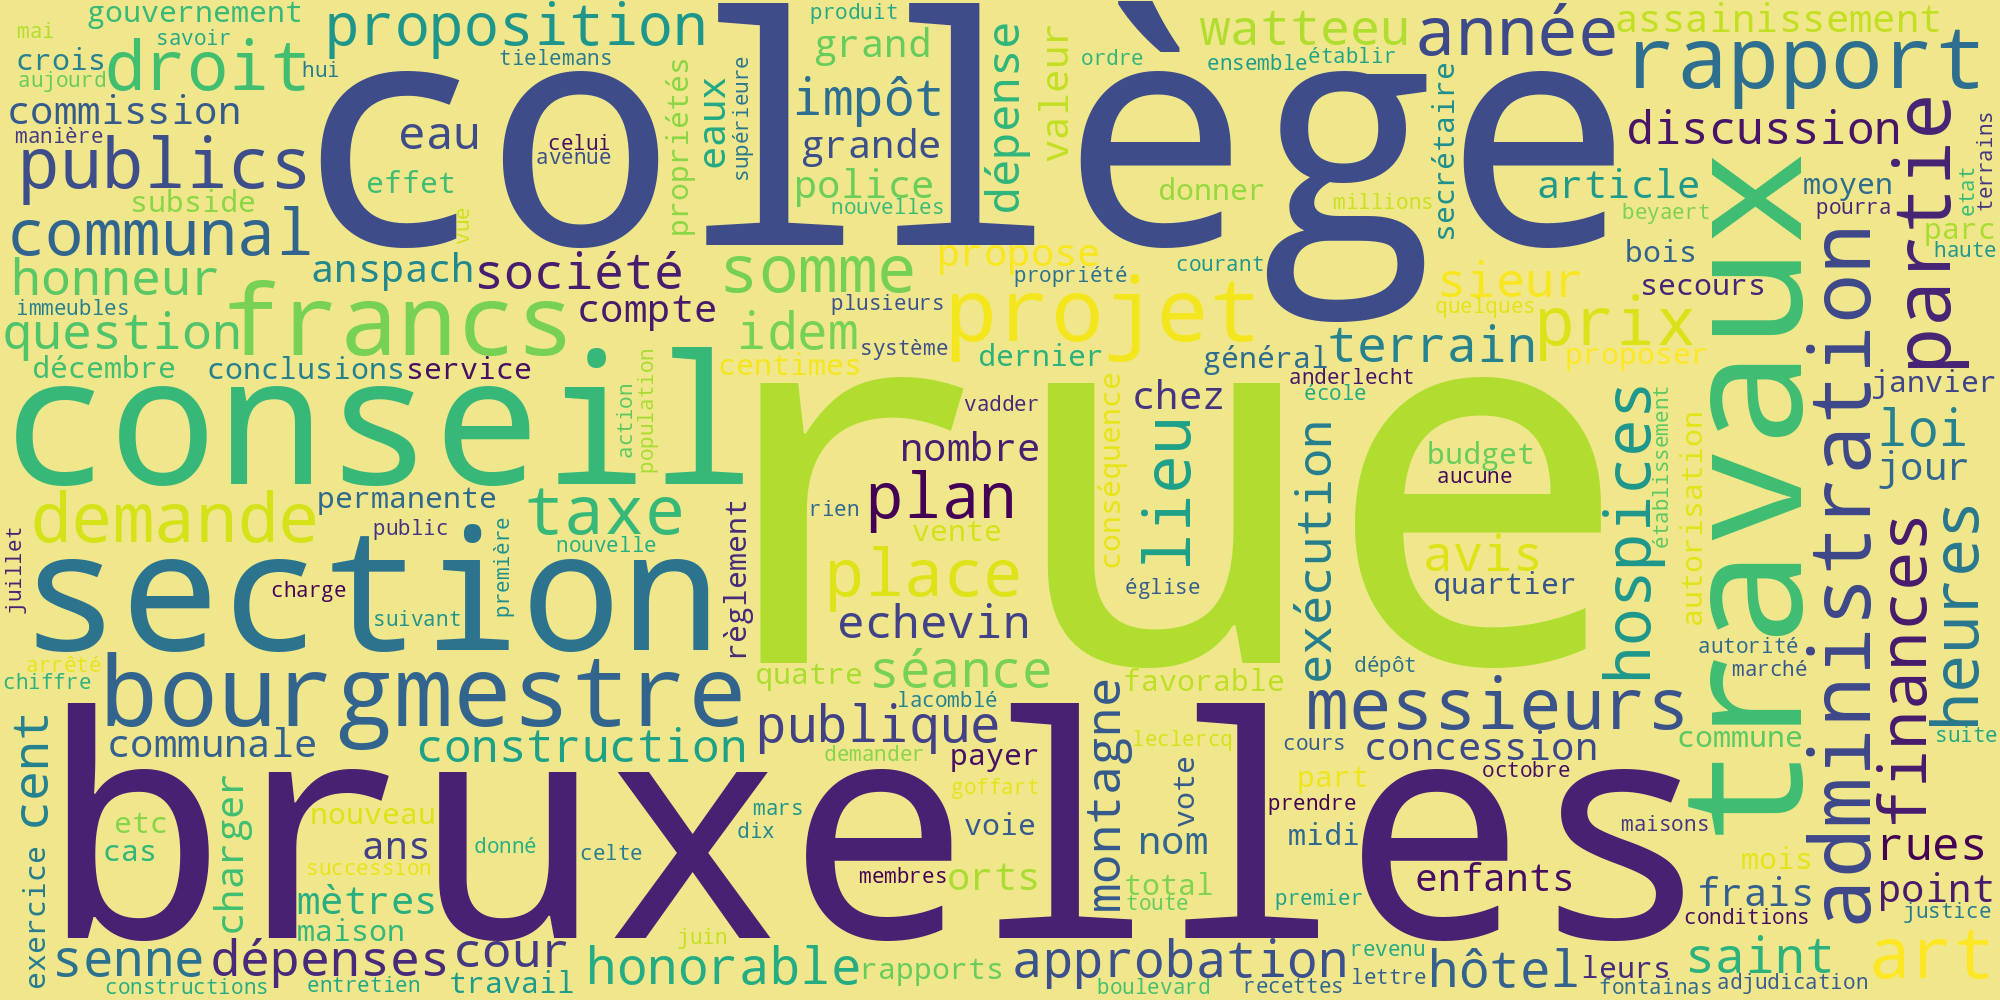

In [122]:
cloud = WordCloud(width=2000, height=1000, background_color='khaki').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Comment trouver les entités nommées principales (personnes, organisations et lieux) pertinentes pour l'année 1865 avec SpaCy

In [44]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [46]:
nlp = spacy.load('fr_core_news_md')

In [48]:
# Charger le texte
n=900000
text = open("../data/tmp/1865_clean.txt", encoding='utf-8').read()[:n]

In [53]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 1min 51s, sys: 5.34 s, total: 1min 57s
Wall time: 2min 1s


### Personnes

In [50]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [54]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans les corpus de 1865")

echevin watteeu apparait 79 fois dans les corpus de 1865
anspach apparait 74 fois dans les corpus de 1865
beyaert apparait 53 fois dans les corpus de 1865
echevin goffart apparait 31 fois dans les corpus de 1865
goffart apparait 30 fois dans les corpus de 1865
messieurs apparait 28 fois dans les corpus de 1865
fontainas apparait 27 fois dans les corpus de 1865
bischoffsheim apparait 24 fois dans les corpus de 1865
watteeu apparait 22 fois dans les corpus de 1865
vadder apparait 21 fois dans les corpus de 1865
jules anspach apparait 18 fois dans les corpus de 1865
waux hall apparait 18 fois dans les corpus de 1865
lacomblé collège anspach apparait 16 fois dans les corpus de 1865
victor guiot apparait 16 fois dans les corpus de 1865
leclercq apparait 16 fois dans les corpus de 1865
lacomblé apparait 15 fois dans les corpus de 1865
walter apparait 14 fois dans les corpus de 1865
jacobs apparait 13 fois dans les corpus de 1865
depaire apparait 13 fois dans les corpus de 1865
anspach lacomb

### Organisations

In [60]:
# Compter les organisations
organisation = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1

In [61]:
# Trier et imprimer

sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)

for organisation, freq in sorted_organisation[:50]:
    print(f"{organisation} apparait {freq} fois dans les corpus de 1865")

arenberg apparait 8 fois dans les corpus de 1865
anspach lacomblé apparait 6 fois dans les corpus de 1865
section desfinances apparait 4 fois dans les corpus de 1865
vanrotterdam rue apparait 3 fois dans les corpus de 1865
dewit apparait 3 fois dans les corpus de 1865
collège anspach apparait 2 fois dans les corpus de 1865
anspach lacomblé prix pain apparait 1 fois dans les corpus de 1865
blaes idem idem apparait 1 fois dans les corpus de 1865
porle apparait 1 fois dans les corpus de 1865
wyns rue apparait 1 fois dans les corpus de 1865
union artistes liégeois remerciments donateur apparait 1 fois dans les corpus de 1865
tarlier don bibliothèque populaire exemplaire recueil consulaire apparait 1 fois dans les corpus de 1865
vadder apparait 1 fois dans les corpus de 1865
conseil godefroy apparait 1 fois dans les corpus de 1865
godefroy apparait 1 fois dans les corpus de 1865
beiges elite apparait 1 fois dans les corpus de 1865
bruxelles programme arrêté apparait 1 fois dans les corpus d

### Lieux

In [62]:
# Compter les lieux 
lieux = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        lieux[ent.text] += 1

In [63]:
# Trier et imprimer

sorted_lieux = sorted(lieux.items(), key=lambda kv: kv[1], reverse=True)

for lieux, freq in sorted_lieux[:50]:
    print(f"{lieux} apparait {freq} fois dans les corpus de 1865")

bruxelles apparait 530 fois dans les corpus de 1865
paris apparait 28 fois dans les corpus de 1865
belgique apparait 23 fois dans les corpus de 1865
echevins bruxelles apparait 20 fois dans les corpus de 1865
rue namur apparait 17 fois dans les corpus de 1865
rue cantersteen apparait 15 fois dans les corpus de 1865
etterbeek apparait 10 fois dans les corpus de 1865
londres apparait 10 fois dans les corpus de 1865
singelé apparait 10 fois dans les corpus de 1865
rue granvelle apparait 9 fois dans les corpus de 1865
vanobbergen apparait 8 fois dans les corpus de 1865
rue parc apparait 8 fois dans les corpus de 1865
rue madeleine apparait 8 fois dans les corpus de 1865
rue anderlecht apparait 7 fois dans les corpus de 1865
etat apparait 7 fois dans les corpus de 1865
vilvorde apparait 6 fois dans les corpus de 1865
lacomblé collège anspach apparait 5 fois dans les corpus de 1865
angleterre apparait 5 fois dans les corpus de 1865
molenbeek apparait 5 fois dans les corpus de 1865
herpels ru

## 10 phrases dans les documents de l’année 1865 analysés à l’aide du Textblob-FR

Documentation: https://textblob.readthedocs.io/en/dev/

In [64]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [67]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positif"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% négatif"
    else:
        polarity_str = "neutre"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjectif"
    else:
        subjectivity_str = "parfaitement objectif"
    print(f"Ce texte est {polarity_str} et {subjectivity_str}.")

### Tokenizer "punky" pour diviser un texte en une liste de phrases

In [66]:
nltk.download('punkt')
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sélectionner arbitrairement des phrases dans les documents de l’année 1865

In [142]:
text = open("../data/tmp/1865.txt", encoding='utf-8').read()[:n]
sentence = nltk.tokenize.sent_tokenize(text)
random_sentence = random.choice (sentence)

## Les 10 phrases arbitrairement choisies dans les documents de l’année de 1865

In [94]:
# Phrase N°1
print (random_sentence) 
get_sentiment(random_sentence)

Telle acquisition, régularisée par acte notarié du 51 mai 1804,
avait été autorisée par la dêputation permanente, le 10 mars précédent.
Ce texte est 2% positif et 0.10000000000000002% subjectif.


In [101]:
# Phrase N°2
print (random_sentence) 
get_sentiment(random_sentence)

Depuis ce temps-là, l'expérience a éclairci celte
question.
Ce texte est neutre et parfaitement objectif.


In [103]:
# Phrase N°3
print (random_sentence) 
get_sentiment(random_sentence)

Dans le plus humble hameau
comme dans les plus riches cités, tous les cœurs obéissent à la
même pensée.
Ce texte est 14% positif et 0.47500000000000003% subjectif.


In [109]:
# Phrase N°4
print (random_sentence) 
get_sentiment(random_sentence)

Voici pourquoi : si nous pouvions simplement percevoir les centimes additionnels sur les immeubles sans nous inquiéter du reste


de la succession, la chose serait très-simple.
Ce texte est 12% positif et 0.35000000000000003% subjectif.


In [115]:
# Phrase N°5
print (random_sentence) 
get_sentiment(random_sentence)

Beyaert, d é c r é tera trois rues dont l'exécution n'aura lieu que successivement.
Ce texte est neutre et parfaitement objectif.


In [117]:
# Phrase N°6
print (random_sentence) 
get_sentiment(random_sentence)

I.e« corporations se perpétuent de telle façon que les béritir'- des associés n'ont, jamais rien à recueillir dans l'avoir social.
Ce texte est 25% positif et 0.1% subjectif.


In [121]:
# Phrase N°7
print (random_sentence) 
get_sentiment(random_sentence)

Beyaert comprend trois rues aboutissant
au milieu de la colline, à la rue Cantersteen, et ayant l'une et l'autre
une pente de G à 7 centimètres par mètre, c'est-à-dire ne donnant
aucune facilité au roulage.
Ce texte est 10% négatif et parfaitement objectif.


In [123]:
# Phrase N°8
print (random_sentence) 
get_sentiment(random_sentence)

» Si le délai fixé par cette sommation est expiré sans que la
déclaration ait été faite, le préposé décernera une contrainte contre
le redevable en retard, aux fins de payer une somme à y exprimer,
sauf à en régulariser définitivement le montant, d'après ce qui sera
trouvé dû suivant la liquidation du droit.
Ce texte est 4% positif et 0.1875% subjectif.


In [133]:
# Phrase N°9
print (random_sentence) 
get_sentiment(random_sentence)

applicable à des travaux d'utilité publique; en 1864,
l'excédant est réduit à 155,000 fr.
Ce texte est 5% négatif et 0.1% subjectif.


In [143]:
# Phrase N°10
print (random_sentence) 
get_sentiment(random_sentence)

11 est manifeste, d'ailleurs, que l'exécution de cet ensemble serait
une immense amélioration pour la circulation, et un bienfait plus
grand encore au point de vue de la salubrité publique.
Ce texte est 22% positif et 0.265% subjectif.


In [157]:
from tabulate import tabulate

l = [["Phrase N°1", 2, "0.10000000000000002% subjectif"], ["Phrase N°2", 0, "parfaitement objectif"], ["Phrase N°3", 14, "0.47500000000000003% subjectif"], ["Phrase N°4", 12, "0.35000000000000003% subjectif"],
     ["Phrase N°5", 0, "parfaitement objectif"], ["Phrase N°6", 25, "0.1% subjectif"], ["Phrase N°7", -10, "parfaitement objectif"], ["Phrase N°8", 4, "0.1875% subjectif"],
     ["Phrase N°9", -5, "0.1% subjectif"], ["Phrase N°10", 22, "0.265% subjectif"]]
table = tabulate(l, headers=['N° de Phrase', 'Polarité', 'Subjectivité'], tablefmt='orgtbl')

print(table)

| N° de Phrase   |   Polarité | Subjectivité                   |
|----------------+------------+--------------------------------|
| Phrase N°1     |          2 | 0.10000000000000002% subjectif |
| Phrase N°2     |          0 | parfaitement objectif          |
| Phrase N°3     |         14 | 0.47500000000000003% subjectif |
| Phrase N°4     |         12 | 0.35000000000000003% subjectif |
| Phrase N°5     |          0 | parfaitement objectif          |
| Phrase N°6     |         25 | 0.1% subjectif                 |
| Phrase N°7     |        -10 | parfaitement objectif          |
| Phrase N°8     |          4 | 0.1875% subjectif              |
| Phrase N°9     |         -5 | 0.1% subjectif                 |
| Phrase N°10    |         22 | 0.265% subjectif               |
